**In notebook settings do not select Omit code cell output when saving this notebook **


In this assignement you will build two models to classify x ray images of potential covid 19 patients using a MLP and a CNN. For Test and training data refer to canvas.





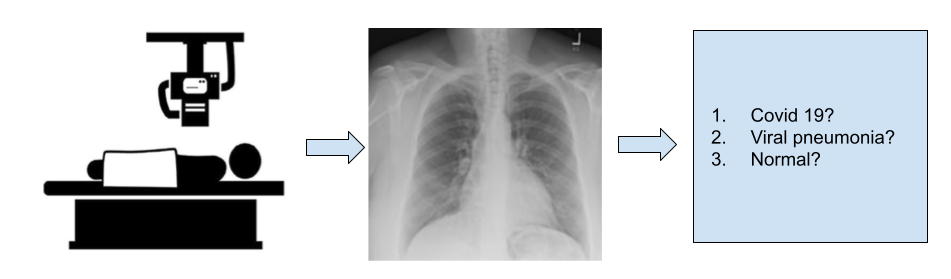

Step 01 : import any libraries you want here. Some common ones are already imported.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# add additional libraries used

Step 02 : upload the data from canvas to the top level folder of your google drive. write code to load the data from the google drive.

In [14]:
root_path = '/content/drive/MyDrive/Covid19-dataset' # do not change the root path.

## TODO: load data and generate corresponding labels

def load_data(root_path):
    images = []
    labels = []
    for label in os.listdir(root_path):
        label_path = os.path.join(root_path, label)
        if os.path.isdir(label_path):
            for image_name in os.listdir(label_path):
                image_path = os.path.join(label_path, image_name)
                image = Image.open(image_path)
                # Ensure the image is in RGB mode
                if image.mode != 'RGB':
                    image = image.convert('RGB')
                # Resize the image to a fixed size (e.g., 256x256 pixels)
                image = image.resize((256, 256))
                images.append(np.array(image))
                labels.append(label)
    return np.array(images), np.array(labels)

# Load training and test data
train_data, train_labels = load_data(os.path.join(root_path, 'train'))
test_data, test_labels = load_data(os.path.join(root_path, 'test'))

# Convert labels to numerical values
encoder = LabelEncoder()
train_labels = encoder.fit_transform(train_labels)
test_labels = encoder.transform(test_labels)

Step 03: visualize one x-ray image from each type : "covid 19", "viral pneumonia", "normal"

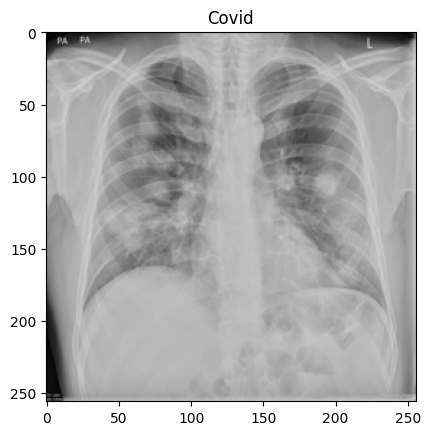

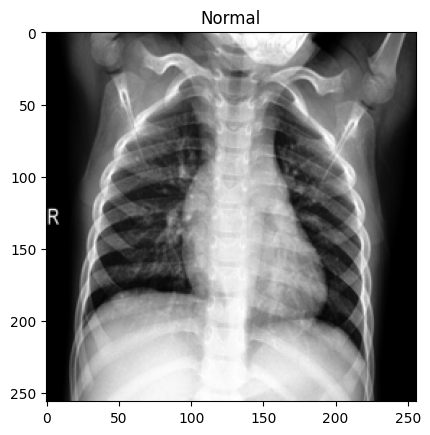

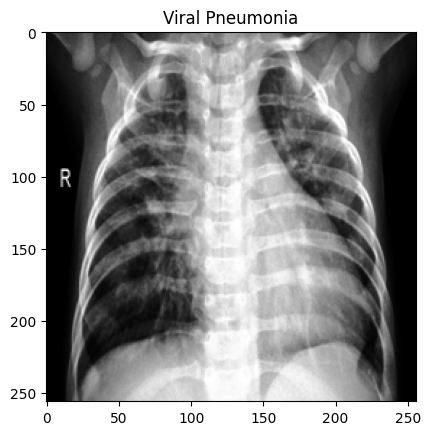

In [15]:
## TODO
def visualize_images(data, labels, encoder):
    for label in encoder.classes_:
        label_index = encoder.transform([label])[0]
        label_data = data[labels == label_index]
        plt.imshow(label_data[0], cmap='gray')
        plt.title(label)
        plt.show()

visualize_images(train_data, train_labels, encoder)

Step 04 : Use a multi layer perceptron to train a classifer for this problem.

In [16]:
# Prepare the data for MLP
# Since MLP expects flat arrays, we need to flatten the images
X_train = train_data.reshape(train_data.shape[0], -1)
X_test = test_data.reshape(test_data.shape[0], -1)

# Initialize the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the MLP classifier
mlp.fit(X_train, train_labels)

# Predict the test set results
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = mlp.score(X_test, test_labels)
print(f"MLP Accuracy: {accuracy}")


MLP Accuracy: 0.8181818181818182


Step 05 : Draw the confution matrix. Starter code is given below.

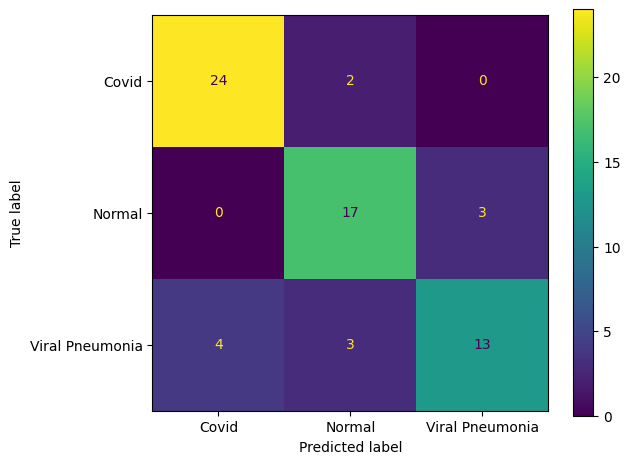

In [17]:
# Confusion Matrix
cm = confusion_matrix(test_labels, y_pred)
ConfusionMatrixDisplay(cm, display_labels=encoder.classes_).plot()
plt.tight_layout()
plt.show()

Step 06 : Use a convolutional neural network (CNN) to train a classifier for this problem.

In [21]:
# Prepare the data for CNN
# CNN expects 3D arrays (height, width, channels)
X_train = train_data.reshape(train_data.shape[0], 256, 256, 3)
X_test = test_data.reshape(test_data.shape[0], 256, 256, 3)

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
history = model.fit(X_train, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Predict the test set results
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to class labels
# Assuming the highest probability class is the predicted class
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Calculate accuracy
accuracy = np.mean(y_pred == test_labels)
print(f"CNN Accuracy: {accuracy}")

Epoch 1/10
7/7 [==============================] - 30s 4s/step - loss: 5.2168 - accuracy: 0.4500 - val_loss: 0.9732 - val_accuracy: 0.0784
Epoch 2/10
7/7 [==============================] - 26s 4s/step - loss: 0.5582 - accuracy: 0.8350 - val_loss: 0.9100 - val_accuracy: 0.6471
Epoch 3/10
7/7 [==============================] - 43s 6s/step - loss: 0.1720 - accuracy: 0.9600 - val_loss: 0.2803 - val_accuracy: 0.9216
Epoch 4/10
7/7 [==============================] - 29s 4s/step - loss: 0.0798 - accuracy: 0.9750 - val_loss: 0.8690 - val_accuracy: 0.6275
Epoch 5/10
7/7 [==============================] - 28s 4s/step - loss: 0.0258 - accuracy: 0.9950 - val_loss: 1.4418 - val_accuracy: 0.5294
Epoch 6/10
7/7 [==============================] - 29s 4s/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.7834 - val_accuracy: 0.7255
Epoch 7/10
7/7 [==============================] - 27s 4s/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.3708 - val_accuracy: 0.5490
Epoch 8/10
7/7 [==================

Step 07 : Draw the confution matrix. Starter code is given below.

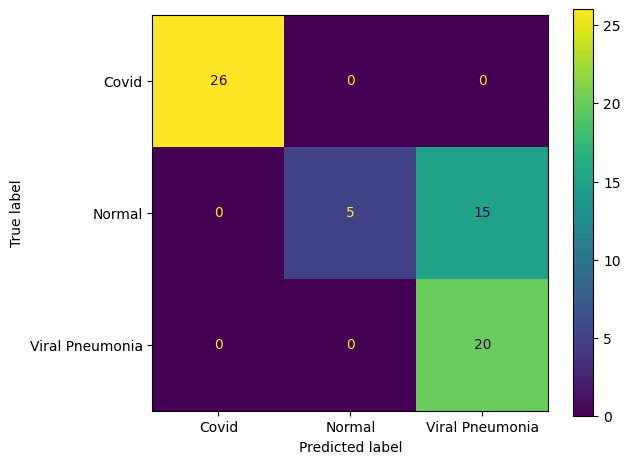

In [22]:
# Confusion Matrix
cm = confusion_matrix(test_labels, y_pred)
ConfusionMatrixDisplay(cm, display_labels=encoder.classes_).plot()
plt.tight_layout()
plt.show()